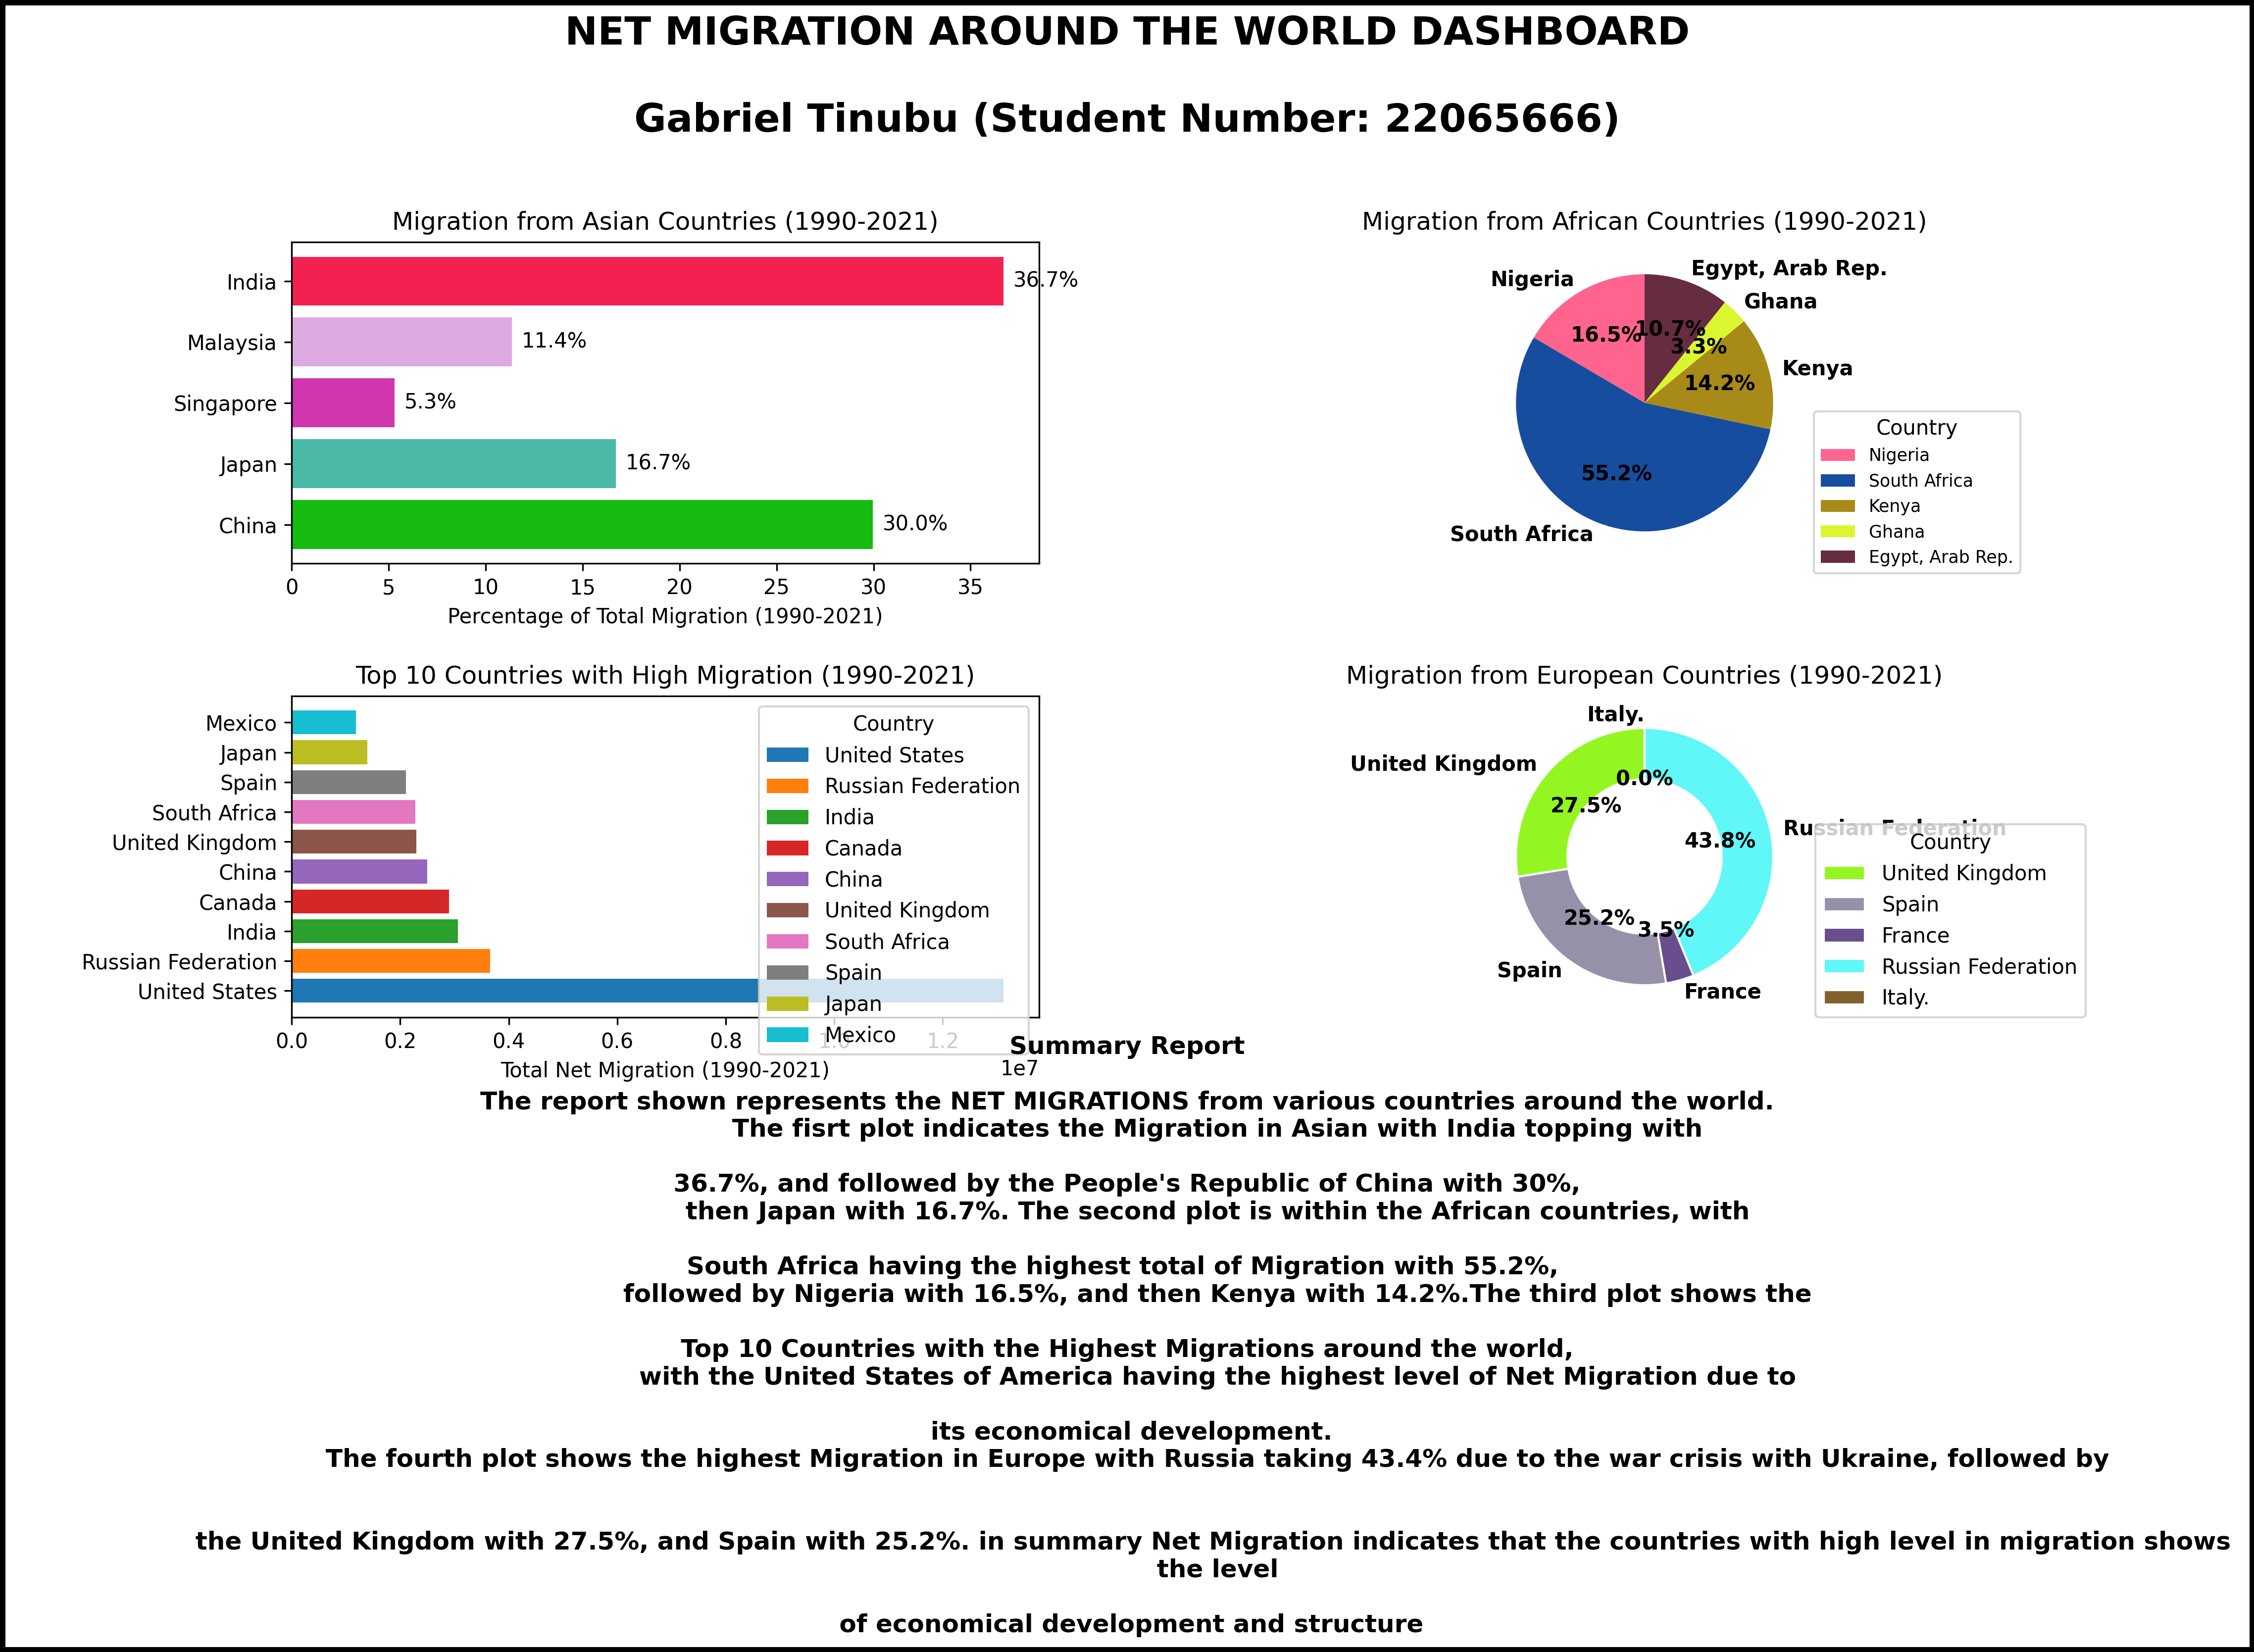

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan  7 00:41:53 2024

@author: Gabriel Tinubu
@github: https://github.com/2023Shoggy/Inforgraphic/tree/main
"""


import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading in the dataset
migrate = pd.read_csv('Net_Migration_Data.csv')

# Sorting Countries with high Migration column
country = migrate.sort_values('Country Name', ascending=False)
country = country.head(10)

# Abbreviate countries with long names
country['Abbr'] = country['Country Name'].replace({'United Kingdom': 'UK', 'United Arab Emirates': 'UAE',
                                                     'Russian Federation': 'Russia', 'Egypt, Arab Rep.': 'Egypt'})


# Drop the column for the year 2022
migrate = migrate.drop(columns=['2022 [YR2022]'])


country = country.drop(columns=['2022 [YR2022]'])

# Check Dataset for Missing Values
migrate = migrate.dropna()

#Selecting the Columns to be used
migrate = migrate[['Series Name', 'Country Name', '1990 [YR1990]', '2000 [YR2000]', '2013 [YR2013]', '2014 [YR2014]',
                   '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                   '2021 [YR2021]']]



# List of African countries
afri_count = ['Nigeria', 'South Africa', 'Kenya', 'Ghana', 'Egypt, Arab Rep.']

# Create a variable for African countries
df_afri = migrate[migrate['Country Name'].isin(afri_count)]

# List of American countries
america_count = ['United States', 'Canada', 'Mexico', 'Brazil']

# Create a variable for Asia Countries
df_america = migrate[migrate['Country Name'].isin(america_count)]

# List of Asian countries
asia_count = ['China', 'Japan', 'Singapore', 'Malaysia', 'India']

# Create a variable for Asia Countries
df_asia = migrate[migrate['Country Name'].isin(asia_count)]

# List of European countries
euro_count = ['United Kingdom', 'Spain', 'France', 'Russian Federation', 'Italy']

# Create a variable for European Countries
df_euro = migrate[migrate['Country Name'].isin(euro_count)]

# Creating a pie chart for migration from 1990 to 2021
total_migration = df_afri.iloc[:, 2:].abs().sum().sum()

# Selecting the specified European countries
euro_countries = ['United Kingdom', 'Spain', 'France', 'Russian Federation', 'Italy.']
df_euro = migrate[migrate['Country Name'].isin(euro_countries)]

# Creating a pie chart for migration from 1990 to 2021
total_migration = df_euro.iloc[:, 2:].abs().sum().sum()

# Calculate the percentage of migration for each country
migration_percentages2 = [df_euro[df_euro['Country Name'] == country].iloc[:, 2:].abs().sum().sum() / total_migration * 100
                         for country in euro_countries]

# Use a random color for each country
my_euro = len(euro_countries)
colors = np.random.rand(my_euro, 3)

# List of American countries
america_count = ['United States', 'Canada', 'Mexico', 'Brazil']
df_america = migrate[migrate['Country Name'].isin(america_count)]

# Calculate the total migration for normalization
total_migration = df_america.iloc[:, 2:].abs().sum().sum()

# Calculate the percentage of migration for each country
migration_percentages4 = [df_america[df_america['Country Name'] == country].iloc[:, 2:].abs().sum().sum() / total_migration * 100
                         for country in america_count]

# Generate random colors for each bar
colors = np.random.rand(len(america_count), 3)

# Figure Size for Plot
fig = plt.figure(figsize=(15, 9), dpi=300)

# Subtitle Header to Dashboard
plt.suptitle('NET MIGRATION AROUND THE WORLD DASHBOARD\n\nGabriel Tinubu (Student Number: 22065666)',
             weight=1000, size=19, y=1.05)
plt.subplots_adjust()

# Creating a gridspec object
sub_gs = gridspec.GridSpec(4, 4, wspace=0.9, hspace=1.4)



# Plotting 1
ax1 = plt.subplot(sub_gs[2:4, 0:2])
# Selecting the top 10 countries based on the sum of absolute net migration values
numeric_columns = migrate.columns[2:]  # Assuming the numeric data starts from the third column
top_countries = migrate.groupby('Country Name')[numeric_columns].sum().abs().sum(axis=1).nlargest(10).index
df_top = migrate[migrate['Country Name'].isin(top_countries)]

# Creating a horizontal bar plot
for i, country in enumerate(top_countries):
    ax1.barh(i, df_top[df_top['Country Name'] == country][numeric_columns].abs().sum(axis=1).values[0], label=country)

ax1.set_yticks(range(len(top_countries)))
ax1.set_yticklabels(top_countries)
ax1.set_xlabel('Total Net Migration (1990-2021)')
ax1.set_title('Top 10 Countries with High Migration (1990-2021)')
ax1.legend(title='Country')


# Plotting 2
ax2 = plt.subplot(sub_gs[0:2, 2:4])
# Generate random colors for each wedge
my_africa = len(afri_count)
colors_africa = np.random.rand(my_africa, 3)

# Creating the pie chart with unique colors and adjusting layout
wedges, texts, autotexts = ax2.pie(migration_percentages1, labels=afri_count, autopct='%1.1f%%', startangle=90, colors=colors_africa)

# Increase the size of the text on the wedges for better visibility
for text, autotext in zip(texts, autotexts):
    text.set(size=10, weight='bold')
    autotext.set(size=10, weight='bold')

# Move the legend outside the pie chart to avoid overlap
ax2.legend(wedges, afri_count, title='Country', bbox_to_anchor=(1, 0.5), fontsize='small')
ax2.set_title('Migration from African Countries (1990-2021)')



# Plotting 3
ax3 = plt.subplot(sub_gs[2:4, 2:4])
# Use a random color for each country
my_euro = len(euro_countries)
colors_euro = np.random.rand(my_euro, 3)

# Creating the pie chart with a white circle in the center
wedges, texts, autotexts = ax3.pie(migration_percentages2, labels=euro_countries, autopct='%1.1f%%', startangle=90,
                                   colors=colors_euro, wedgeprops=dict(width=0.4, edgecolor='w'))

# Increase the size of the text on the wedges for better visibility
for text, autotext in zip(texts, autotexts):
    text.set(size=10, weight='bold')
    autotext.set(size=10, weight='bold')

# Move the legend outside the pie chart to avoid overlap
ax3.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.3))
ax3.set_title('Migration from European Countries (1990-2021)')



# Plotting 4
ax4 = plt.subplot(sub_gs[0:2, 0:2])
# Use a random color for each country
my_asia = len(asia_countries)
colors_asia = np.random.rand(my_asia, 3)

# Creating the horizontal bar plot
bars = ax4.barh(asia_countries, migration_percentages3, color=colors_asia)

# Add labels and percentages to the bars
for bar, percentage in zip(bars, migration_percentages3):
    ax4.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', size=10)

# Set axis labels and title
ax4.set_xlabel('Percentage of Total Migration (1990-2021)')
ax4.set_title('Migration from Asian Countries (1990-2021)')


# Setting a boarderline around the dashboard
fig = plt.gcf()
fig.patch.set_linewidth(5)  # set the width of the figure border
fig.patch.set_edgecolor('black')  # set the color of the figure border


Report_Analysis = """\n\n\n\nSummary Report\n\nThe report shown represents the NET MIGRATIONS from various countries around the world.
                     The fisrt plot indicates the Migration in Asian with India topping with\n\n 36.7%, and followed by the People's Republic of China with 30%,
                     then Japan with 16.7%. The second plot is within the African countries, with\n\nSouth Africa having the highest total of Migration with 55.2%,
                     followed by Nigeria with 16.5%, and then Kenya with 14.2%.The third plot shows the\n\n Top 10 Countries with the Highest Migrations around the world,
                     with the United States of America having the highest level of Net Migration due to\n\n  its economical development.
                     The fourth plot shows the highest Migration in Europe with Russia taking 43.4% due to the war crisis with Ukraine, followed by\n\n
                     the United Kingdom with 27.5%, and Spain with 25.2%. in summary Net Migration indicates that the countries with high level in migration shows
                     the level\n\n of economical development and structure"""

textbox = plt.text(0.5, -0.16, Report_Analysis, transform=fig.transFigure,
                   fontsize=12, fontweight='bold', horizontalalignment='center')

plt.subplots_adjust(bottom=0.3)

# Saving the dashboard as a PNG file
plt.savefig('22065666.png', dpi=300)

